<a href="https://colab.research.google.com/github/Jairosssgu/Challenge-Amigo-Secreto-Alura/blob/main/Desafio_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# Extracción

In [8]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

dataframe_datos = pd.read_json(url)
dataframe_datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Transformación

In [9]:
dataframe_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Cada celda es un diccionario

### Para ver el contenido de la primera celda

In [10]:
dataframe_datos["customer"].iloc[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

#### Haciendo un nuevo dataframe con los valores de la columna de customer

In [11]:
df_customer = dataframe_datos["customer"].apply(pd.Series)
df_customer.info()
df_customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


#### Quiero conocer el nombre de todas las columnas para luego crear dataframes para cada una

In [12]:
dataframe_datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#### Haciendo un nuevo dataframe con los valores de las otras columnas restantes

In [14]:
df_phone = dataframe_datos["phone"].apply(pd.Series)
df_internet = dataframe_datos["internet"].apply(pd.Series)
df_account = dataframe_datos["account"].apply(pd.Series)

#### Junto todos los dataframe en uno solo

In [15]:
df_nodic = pd.concat([df_customer, df_phone, df_internet, df_account], axis=1)
df_nodic.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


#### noté que la ultima columna tiene un diccionario tambien (diccionario aninado), por lo que aplicare el procedimiento en esta columna ahora para desanidar el nuevo dataframe

In [16]:
df_charges = df_nodic["Charges"].apply(pd.Series)

df_charges.head()

,Monthly,Total
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.4


#### Junto ahora todo otra vez

In [17]:
df_nodic = pd.concat([df_customer, df_phone, df_internet, df_account, df_charges], axis=1)
df_nodic.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Monthly,Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.4


#### Tengo que eliminar la columna que sigue tiendo diccionarios "Charges

In [18]:
df_nodic = df_nodic.drop('Charges', axis=1)
df_nodic.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Debido a que ya el nuevo dataframe sin diccionarios tiene la misma cantidad de filas que el dataframe original, copiare las primeras columnas del data frame original para asi ya tener todos los datos sin diccionarios juntos. Las columnas que no han sido tratadas del dataframe original son "customerID" y "Churn"

In [19]:
df_nodic.insert(0, "customerID", dataframe_datos["customerID"])
df_nodic.insert(1, "Churn", dataframe_datos["Churn"])
df_nodic.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


####Ya tengo un solo dataframe sin datos en diccionarios y aninados. Procedo con el siguiente punto del desafio

In [20]:
df_nodic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Procedo a verificar si existen datos inconsistentes, nulos o duplicados

In [21]:
print(df_nodic.isnull().sum())
print(df_nodic.duplicated().sum())
print(df_nodic[df_nodic.duplicated()].shape[0])

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64
0
0


##Verificar valores unicos

In [22]:
print(df_nodic.nunique())

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Monthly             1585
Total               6531
dtype: int64


##La columna "Churn" solo deberia tener dos valores, si o no, vere cual es el tercer valor que marca

In [23]:
print(df_nodic['Churn'].unique())

['No' 'Yes' '']


Hay valores vacios en la columna "Churn", quiero saber cuantos hay

In [27]:
print(df_nodic['Churn'].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


###Hare un df nuevo solo con esos valores vacios para ver porque estan vacios o si existe un patron con las otras columnas

In [28]:
df_vacios = df_nodic[df_nodic['Churn'] == ''].copy()
print(df_vacios.shape)
print(df_vacios.head())

(224, 21)
     customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30   0047-ZHDTW        Female              0      No         No      11   
75   0120-YZLQA          Male              0      No         No      71   
96   0154-QYHJU          Male              0      No         No      29   
98   0162-RZGMZ        Female              1      No         No       5   
175  0274-VVQOQ          Male              1     Yes         No      65   

    PhoneService MultipleLines InternetService  ...         OnlineBackup  \
30           Yes           Yes     Fiber optic  ...                   No   
75           Yes            No              No  ...  No internet service   
96           Yes            No             DSL  ...                  Yes   
98           Yes            No             DSL  ...                  Yes   
175          Yes           Yes     Fiber optic  ...                  Yes   

        DeviceProtection          TechSupport          StreamingTV  \
30          

###Pues, no veo nada raro con los demás valores. No veo u patron tampoco, así que no se como modificar estos valores vacios, si en "si" o en "no". Así que los dejare así por ahora

###Se solicita la creación de una nueva columna de cuentas diarias, para futuros analisis

In [42]:
df_nodic['Cuentas_Diarias'] = df_nodic['Monthly'] / 30
print(df_nodic[['Monthly', 'Cuentas_Diarias']].head())
print(df_nodic['Cuentas_Diarias'].describe())

   Monthly  Cuentas_Diarias
0     65.6         2.186667
1     59.9         1.996667
2     73.9         2.463333
3     98.0         3.266667
4     83.9         2.796667
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


In [44]:
df_nodic.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'Cuentas_Diarias'],
      dtype='object')

###Ya se agrego la nueva columna de Cuentas Diarias en el dataframe

#Carga y análisis

##realizo el analisis descriptivo de todo el dataframe

In [45]:
print(df_nodic.describe(include='all'))

        customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7267  7267   7267    7267.000000    7267       7267   
unique        7267     3      2            NaN       2          2   
top     9995-HOTOH    No   Male            NaN      No         No   
freq             1  5174   3675            NaN    3749       5086   
mean           NaN   NaN    NaN       0.162653     NaN        NaN   
std            NaN   NaN    NaN       0.369074     NaN        NaN   
min            NaN   NaN    NaN       0.000000     NaN        NaN   
25%            NaN   NaN    NaN       0.000000     NaN        NaN   
50%            NaN   NaN    NaN       0.000000     NaN        NaN   
75%            NaN   NaN    NaN       0.000000     NaN        NaN   
max            NaN   NaN    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService  ...  \
count   7267.000000         7267          7267            7267  ...   
unique          NaN          

##Distribución de evasión (graficos de Churns)

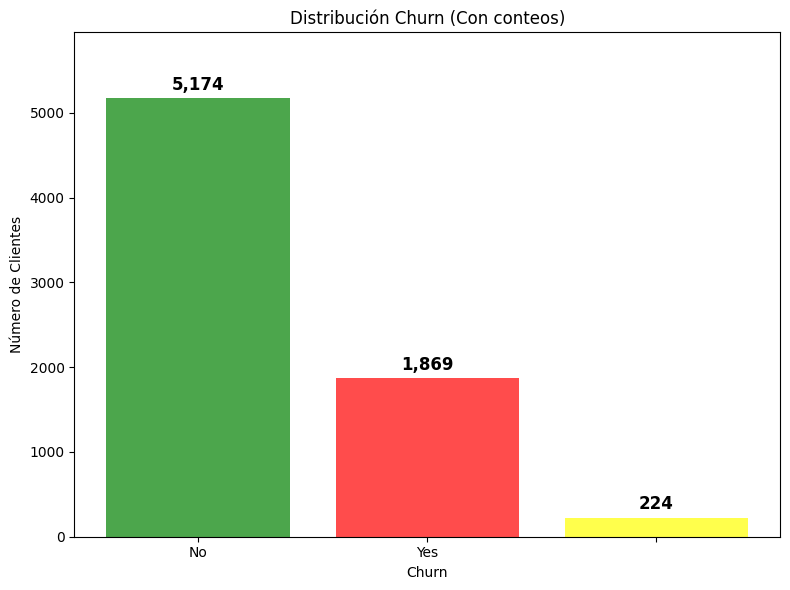

In [57]:
conteos = df_nodic['Churn'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(conteos.index, conteos.values, color=['green', 'red','yellow'], alpha=0.7)

plt.title('Distribución Churn (Con conteos)')
plt.ylabel('Número de Clientes')
plt.xlabel('Churn')


maximo = max(conteos.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,  # +50 padding
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=12)


plt.ylim(0, maximo * 1.15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Recuento de evasión por bases categoricas

In [59]:
categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
for col in categoricas:
    print(f"\n{col}:")
    print(pd.crosstab(df_nodic[col], df_nodic['Churn'], normalize='index').round(3)*100)


gender:
Churn          No   Yes
gender                 
Female  2.9  71.0  26.1
Male    3.3  71.4  25.3

Contract:
Churn                  No   Yes
Contract                       
Month-to-month  3.2  55.4  41.3
One year        3.0  86.0  10.9
Two year        2.8  94.5   2.8

PaymentMethod:
Churn                             No   Yes
PaymentMethod                             
Bank transfer (automatic)  2.8  80.9  16.2
Credit card (automatic)    2.9  82.3  14.8
Electronic check           3.3  52.9  43.8
Mailed check               3.2  78.3  18.5

InternetService:
Churn                   No   Yes
InternetService                 
DSL              2.7  78.9  18.4
Fiber optic      3.2  56.3  40.6
No               3.5  89.4   7.1


###graficare lo anterior para comparar esas categorias y ver cuales tienen más churn

###Churn vs gender

<Figure size 700x500 with 0 Axes>

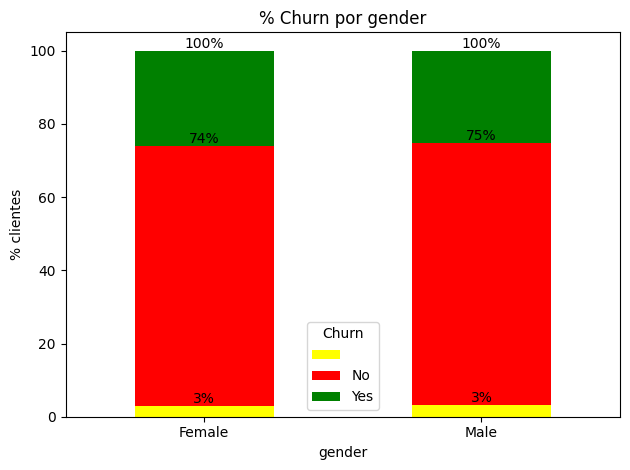

In [71]:
plt.figure(figsize=(7,5))
ct_gender = pd.crosstab(df_nodic['gender'], df_nodic['Churn'], normalize='index') * 100
ct_gender.plot(kind='bar', stacked=True, color=['yellow', 'red','green'])
plt.title('% Churn por gender')
plt.ylabel('% clientes')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f%%')
plt.tight_layout()
plt.show()

####Los valores son muy similares, el genero no afecta la evasión

#### CHurn vs Contract

<Figure size 700x500 with 0 Axes>

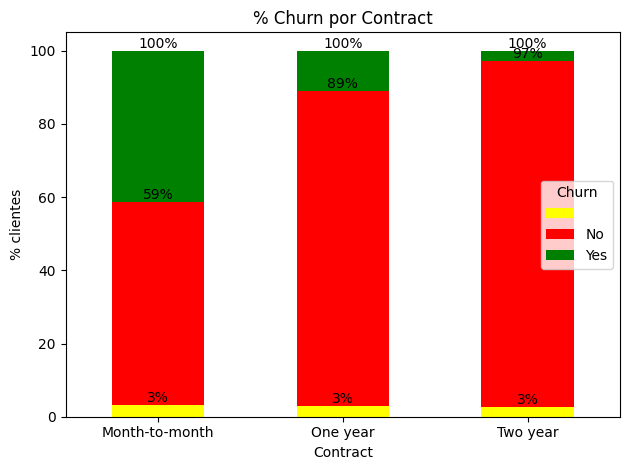

In [110]:
plt.figure(figsize=(7,5))
ct_gender = pd.crosstab(df_nodic['Contract'], df_nodic['Churn'], normalize='index') * 100
ct_gender.plot(kind='bar', stacked=True, color=['yellow', 'red','green'])
plt.title('% Churn por Contract')
plt.ylabel('% clientes')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f%%')
plt.tight_layout()


#Guardar grafico
plt.savefig('/content/Churn_por_Contract.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

####Se aprecia que los contratos de "mes a mes" tienen un alto porcentaje de evasión.

#### CHurn vs PaymentMethod




<Figure size 700x500 with 0 Axes>

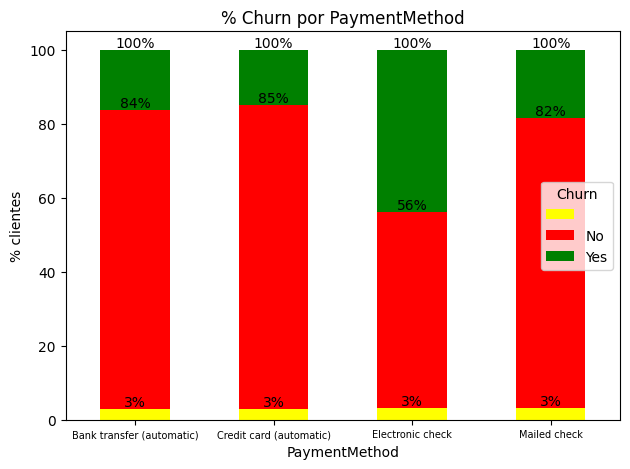

In [112]:
plt.figure(figsize=(7,5))
ct_gender = pd.crosstab(df_nodic['PaymentMethod'], df_nodic['Churn'], normalize='index') * 100
ct_gender.plot(kind='bar', stacked=True, color=['yellow', 'red','green'])
plt.title('% Churn por PaymentMethod')
plt.ylabel('% clientes')
plt.xticks(rotation=0)
plt.tick_params(axis='x', labelsize=7) #los titulos estaban muy largos y chocaban
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f%%')
plt.tight_layout()


#Guardar grafico
plt.savefig('/content/Churn_por_Payment.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

####Acá se obseerva que la evasión es más alta en los pagos con cheque electronico

#### CHurn vs InternetService

<Figure size 700x500 with 0 Axes>

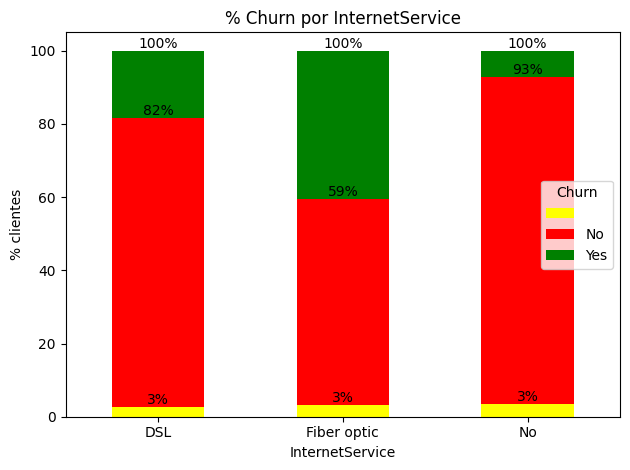

In [114]:
plt.figure(figsize=(7,5))
ct_gender = pd.crosstab(df_nodic['InternetService'], df_nodic['Churn'], normalize='index') * 100
ct_gender.plot(kind='bar', stacked=True, color=['yellow', 'red','green'])
plt.title('% Churn por InternetService')
plt.ylabel('% clientes')
plt.xticks(rotation=0)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f%%')
plt.tight_layout()


#Guardar grafico
plt.savefig('/content/Churn_por_Internet.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

####Se observa que el internet otorgado mediante fibra optica tiene mayor porcentaje de evasión

#Recuento de evasión vs variables númericas

In [82]:
numericas = ['tenure', 'Monthly', 'Cuentas_Diarias']
for col in numericas:
    print(f"\n{col}:")
    print(pd.crosstab(df_nodic[col], df_nodic['Churn'], normalize='index').round(3)*100)


tenure:
Churn           No   Yes
tenure                  
0       0.0  100.0   0.0
1       3.3   36.8  59.9
2       3.3   46.7  50.0
3       3.4   51.2  45.4
4       4.9   50.3  44.9
...     ...    ...   ...
68      3.8   87.5   8.7
69      5.0   87.0   8.0
70      2.5   88.5   9.0
71      3.4   93.2   3.4
72      1.9   96.5   1.6

[73 rows x 3 columns]

Monthly:
Churn             No    Yes
Monthly                    
18.25     0.0  100.0    0.0
18.40     0.0  100.0    0.0
18.55     0.0  100.0    0.0
18.70     0.0  100.0    0.0
18.75    50.0   50.0    0.0
...       ...    ...    ...
118.20    0.0  100.0    0.0
118.35    0.0    0.0  100.0
118.60    0.0  100.0    0.0
118.65    0.0  100.0    0.0
118.75    0.0  100.0    0.0

[1585 rows x 3 columns]

Cuentas_Diarias:
Churn                     No    Yes
Cuentas_Diarias                    
0.608333          0.0  100.0    0.0
0.613333          0.0  100.0    0.0
0.618333          0.0  100.0    0.0
0.623333          0.0  100.0    0.0
0.625000  

###graficare lo anterior para comparar esas categorias númericas y ver cuales tienen más churn

##Churn vs Tenure (antiguedad)

<Figure size 700x500 with 0 Axes>

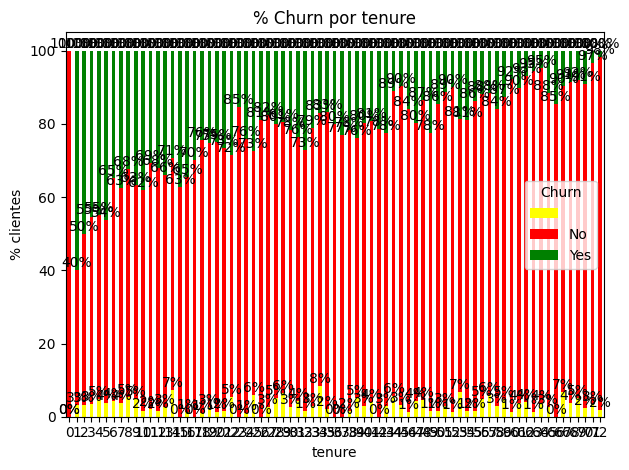

In [83]:
plt.figure(figsize=(7,5))
ct_gender = pd.crosstab(df_nodic['tenure'], df_nodic['Churn'], normalize='index') * 100
ct_gender.plot(kind='bar', stacked=True, color=['yellow', 'red','green'])
plt.title('% Churn por tenure')
plt.ylabel('% clientes')
plt.xticks(rotation=0)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f%%')
plt.tight_layout()
plt.show()

###Se ve muy feo como para entenderlo. Voy a intentar con otro grafico

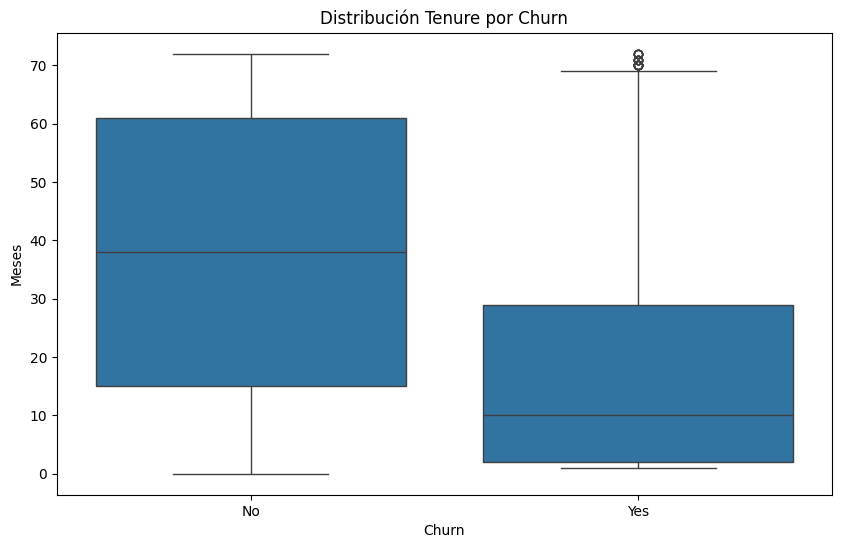

In [116]:
df_clean = df_nodic[df_nodic['Churn'] != '']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Churn', y='tenure')
plt.title('Distribución Tenure por Churn')
plt.ylabel('Meses')


#Guardar grafico
plt.savefig('/content/Churn_por_Tenure.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

####Se puede apreciar que existe más evasión para los clientes con menos meses (menos antiguedad)

##Churn vs Monthly (pago mensual)

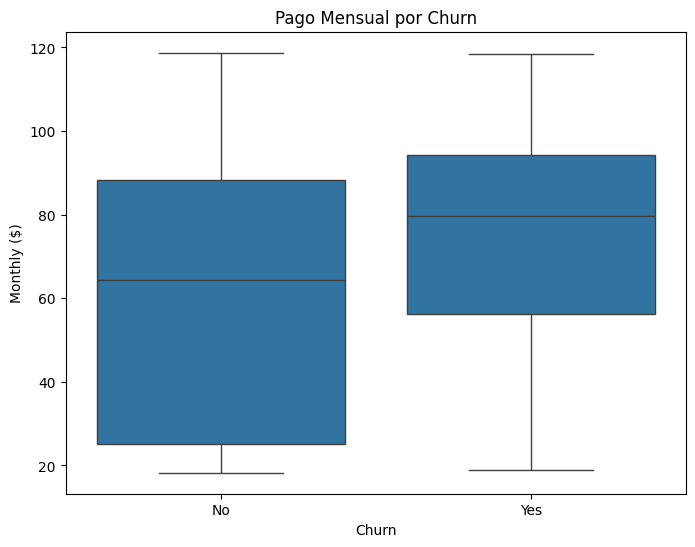

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='Churn', y='Monthly')
plt.title('Pago Mensual por Churn')
plt.ylabel('Monthly ($)')


#Guardar grafico
plt.savefig('/content/Churn_por_Pago.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

###Se puede apreciar que las evasiones se dan a mayores pagos mensuales

##Churn vs Cuentas Diarias

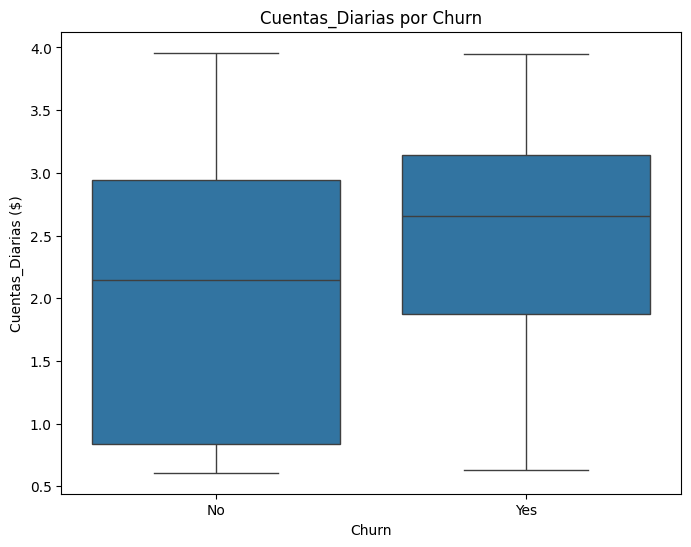

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='Churn', y='Cuentas_Diarias')
plt.title('Cuentas_Diarias por Churn')
plt.ylabel('Cuentas_Diarias ($)')
plt.show()

####Se puede apreciar que las evasiones se dan a mayores pagos diarios, logicamente

#Informe Final

##Introducción.


El siguiente informe tiene como finalidad presentar las conclusiones acerca del estudio realizado con la evasión de clientes (churn) de "Telecom X".

Dicho estudio se solicita debido a una alta tasa de cancelaciones y se necesita comprender patrones o factores que pueden estar ocasionando este evento.

##Limpieza y Tratamiento de Datos.

En primera instancia se extrayeron los datos desde el link otorgado.

Se nota que los mismos vienen en diccionarios, mientras que la columna de "account" tenia los valores en diccionarios aninados.

Se trabajan estos diccionarios convirtiendolos en dataframes separados, para luego unirlos a un solo dataframe que tuviese todos los valores de cada columna. Esto se pudo aplicar sin muchas complicaciones debido a que todos los dataframes tenian el mismo tamaño de filas.

Una vez con el dataframe unificado, se evaluo para ver si tenia datos nulos, duplicados o erroneos. Una vez realizado este proceso, se notó que la columna de "Churns" tenia 3 valores (Yes, No, Vacio). Normalmente los valores vacios se convierten en No, pero a falta de mayores pistas, decidí dejarlos vacios e igual seguir con el analisis. De todas maneras la cantidad de vacios era muy baja como para afectar el estudio (274 valores de un total de 7.267, es decir solo un 3% de los datos).

Las demás columnas no presentaban errores.





##Análisis Exploratorio de Datos.

Para poder sacar conclusiones acerca de la cantidad de evasiones, se procedio a comparar los datos de la columna "Churns" vs otras columnas de relevancia.

De estas comparaciones, las siguientes son las que aportaron información valiosa al estudio:



###Churns vs Contrato

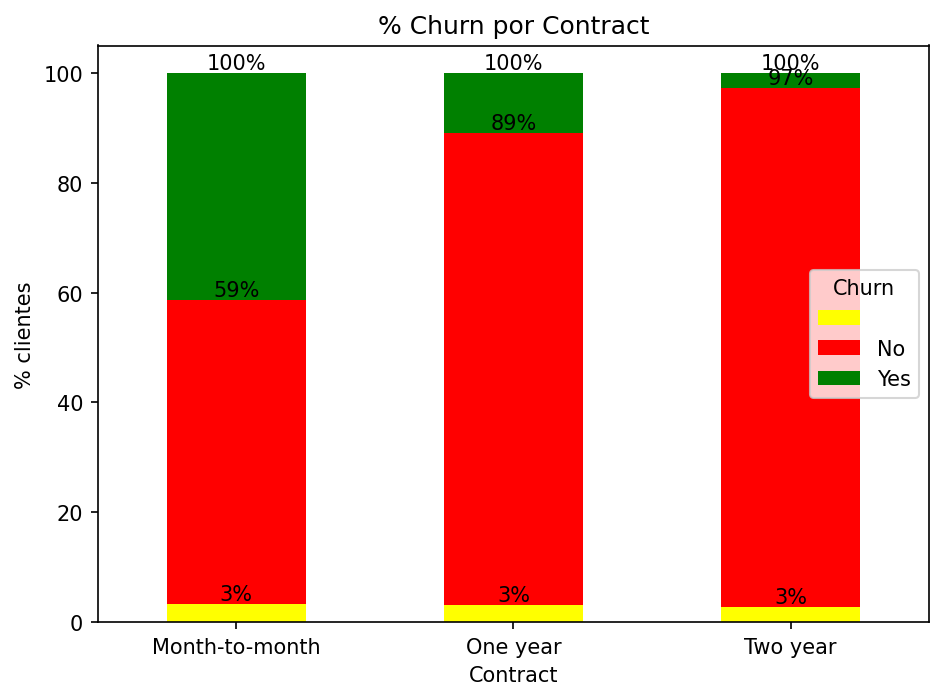

In [111]:
# @title
from IPython.display import Image, display
display(Image('/content/Churn_por_Contract.png', width=700, height=500))

###Puede apreciarse que los contratos "Mes a Mes" tienen un mayor porcentaje de evasión.

###Churns vs Tipo de Pago

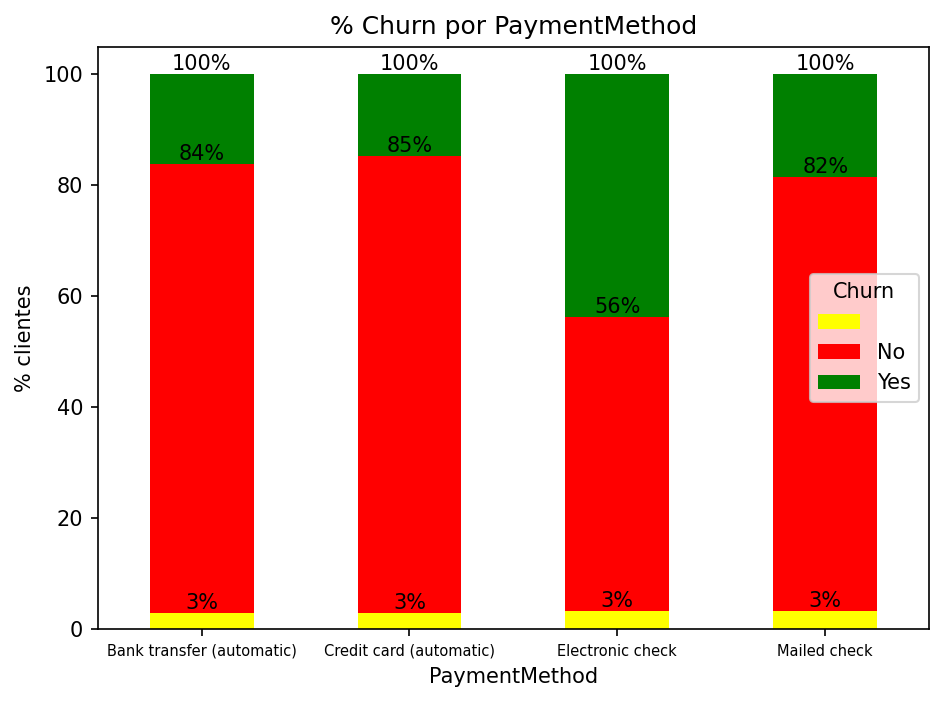

In [113]:
# @title
from IPython.display import Image, display
display(Image('/content/Churn_por_Payment.png', width=700, height=500))

###Para los tipos de pago, la manera de pago de "cheque electronico" es la que presenta mayor porcentaje de evasión.

###Churns vs Tipo de Internet

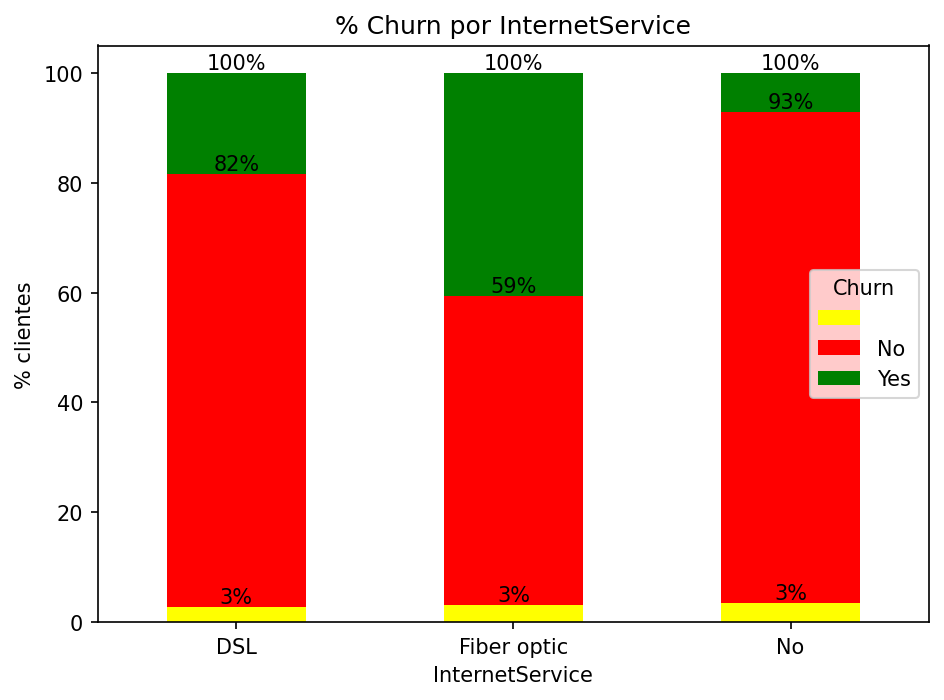

In [115]:
# @title
from IPython.display import Image, display
display(Image('/content/Churn_por_Internet.png', width=700, height=500))

###Mientras que el servicio de Internet que más presenta evasión es el de "Fibra Optica".

###Churn vs Tenure (antiguedad del cliente).

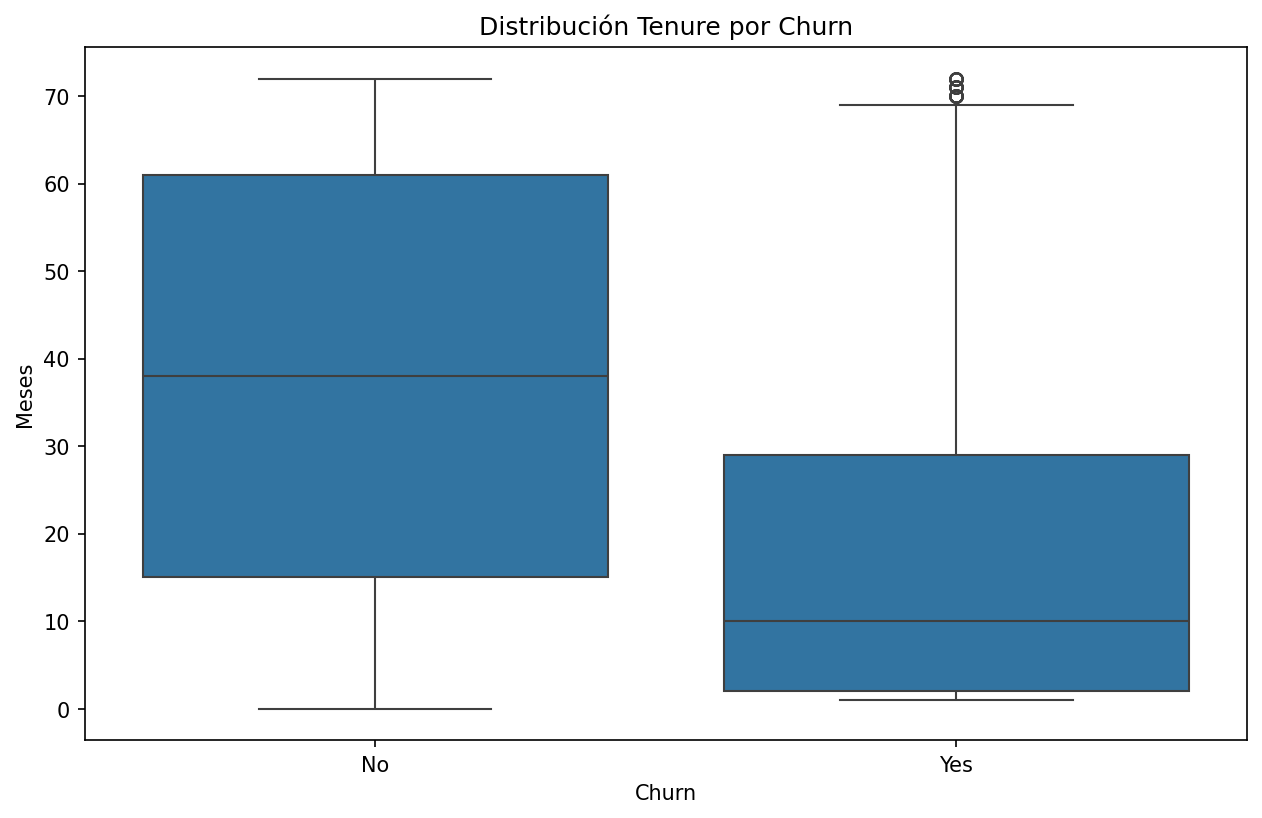

In [117]:
# @title
from IPython.display import Image, display
display(Image('/content/Churn_por_Tenure.png', width=700, height=500))

###Puede observarse que los clientes con menos antiguedad son los que presentan mayor evasión.

###Churn vs Pago mensual.

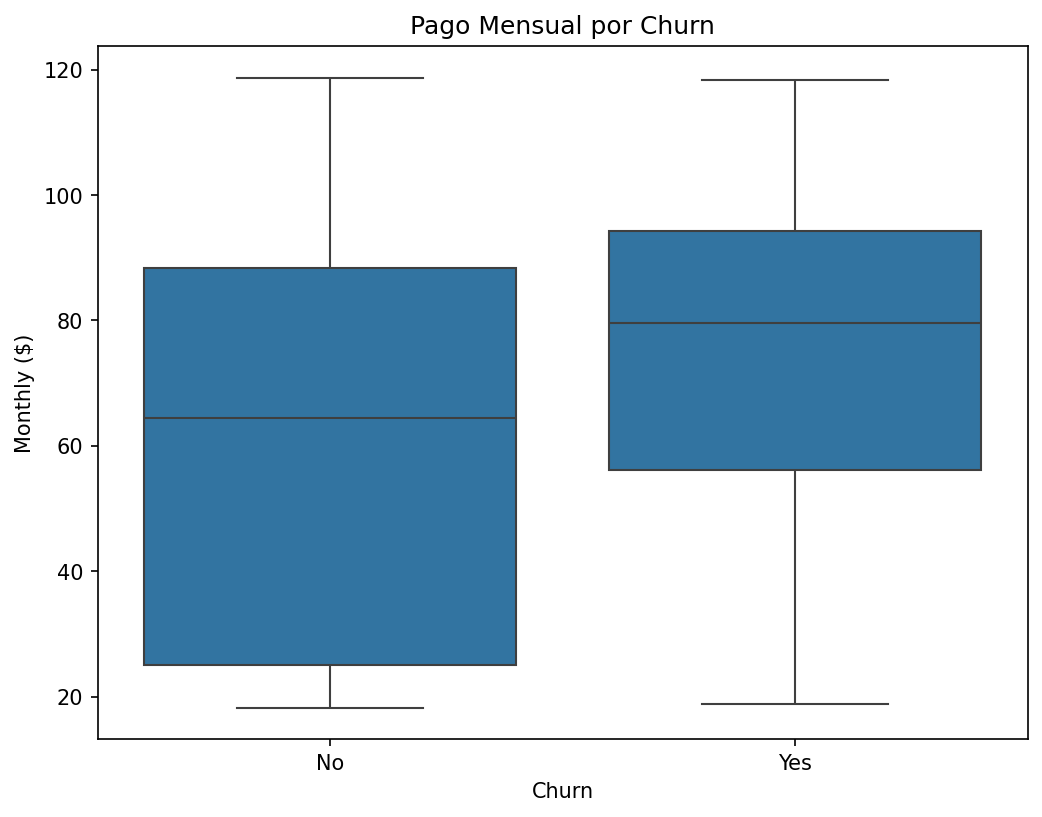

In [119]:
# @title
from IPython.display import Image, display
display(Image('/content/Churn_por_Pago.png', width=700, height=500))

###Finalmente, los clientes que pagan más mensualmente son los que presentan mayor porcentaje de evasión.

##Conclusiones e Insights

Una vez analisados los datos, se puede concluir que los clientes que presentan mayor porcentaje de evasión son:

*Clientes con un contrato de "Mes a Mes".

*Clientes que tienen un internet de fibra óptica.

*Clientes con menos antiguedad.

*Clientes que pagan mediante "cheque electronico".

##Recomendaciones

Se recomienda hacer una evaluación a los contratos de tipo mensuales que posee Telecom X. Quizas se puedan retener a los clientes con modalidades de contratos más largas y más atractivas referentes a descuentos acumulativos por antiguedad.

Tambien deben de gestionar el metodo de pago de "cheque electronico", probablemente eliminarlo y mantener los otros 3 metodos que poseen menos evasión, u otorgar algún beneficio por usar un metodo de pago distinto a "cheque electronico".

Finalmente, evaluar los clientes con fibra optica que terminan evadiendo debido a problemas con esa modalidad de internet. Puede ser mejorando la atención de soporte tecnico para esos clientes.



###Fin del informe